# **1.단순회귀분석 - 봉사료 tips**

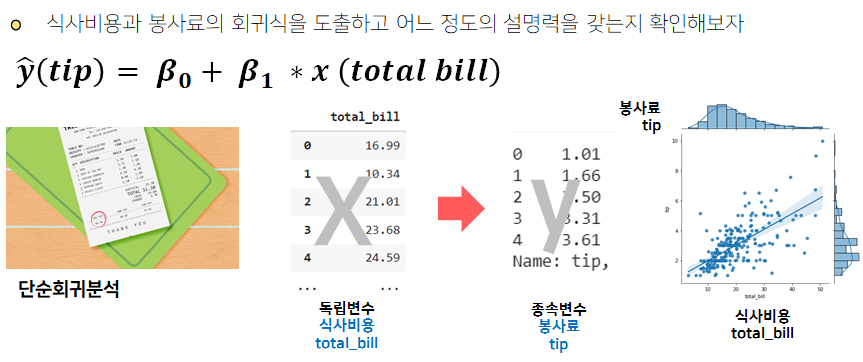

In [ ]:
# 기본적인 라이브러리를 적재한다. 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 1.1 tips 데이터 시각화 

분석 대상이 되는 자료를 읽어들이고,  독립변수, 종속변수 후보에 대해서 분포를 관찰한다. 
* 독립변수 : 식사비용 total_bill
* 종속변수 : 봉사료 tip

In [ ]:
# 1.1.1 봉사료 데이터를 씨본 라이브러리로 부터 읽어 들여서 tips 변수에 할당한다. 
tips = sns.load_dataset('tips')
tips.head()

In [ ]:
# 1.1.2 독립변수 식사비용 total_bill과 종속변수 봉사료 tip을 조인트플롯으로 시각화한다. 

sns.jointplot(data = ..., x= ... , y= ... );

관계가 있어 보이긴 한다. 어떤 직선이 예상되는가?

In [ ]:
# 1.1.3 조인트플롯에서 kind = 'reg' 를 전달하면, 회귀선과 함께 시각화 할 수 있다. 
# tip vs total_bill with kind = reg

sns.jointplot(data= tips, x= 'total_bill', y= 'tip',... );

In [ ]:
# 1.1.4 시각화 된 직선에 대해서 상관계수를 확인해보자. 

...

상관계수가 0.67로 나타난다. '상관계수가 높다'고 할 수 있다. 
단순선형회귀분석에서는 상관계수의 제곱이 결정계수가 된다. 
상관계수를 제곱한 결정계수를 구해보자. 

In [ ]:
# 1.1.5 상관계수에 제곱하여 결정계수를 구해보자. 
...

결정계수는 0.46으로 나타난다. (회귀 분석 결과와 비교해보자.)

## 1.2 단순회귀분석

회귀계수와 결정계수를 구하기 위해서 파이썬 대표 머신러닝 라이브러리 싸이킷런에서 선형회귀모델을 읽어들이고, 분석을 수행해보자.
* 라이브러리명 : import sklearn.linear_model as skl_lm  (선형회귀 서브모듈)
* 독립변수와 종속변수 지정 :
> * 독립변수 :  X (행렬, matrix, 데이터프레임) 관례적으로 대문자 X로 표시
> * 종속변수 :  y (벡터, vector, 시리즈) 관례적으로 소문자 y로 표시
* 분석 알고리즘에 선택 : lr =  skl_lm.LinearRegression()
* 알고리즘의 학습을 통한 모델 구성 : lr.fit(X,y)
* 학습된 모델에서 변수에 대한 계수와 결정계수 확인 : 
> * X의 계수 : lr.coef_   (벡터)
> * 상수항의 계수 : lr.intercept_ (스칼라)
> * 결정계수 $R^2$ : lr.score (X,y)

In [ ]:
# 1.2.1 회귀계수와 결정계수를 구하기 위해서 파이썬 대표 머신러닝 라이브러리
# 읽어들일 모듈 : sklearn.linear_model
# 별칭 : skl_lm


# 2021.10 강의 녹화 시점 버전의  scikit-learn 라이브러리 설치 
# 강의 영상과 약간 다르지만 지우지 마세요(Q&A 참조)
!pip install scikit-learn==0.24.0  

import sklearn.linear_model  as skl_lm

In [ ]:
# 1.2.2 독립변수와 종속변수를 준비한다. 
# 독립변수는 total_bill이다. 이 때, 독립변수는 복수개의 변수도 처리할 수 있도록 데이터프레임 형태로 전달한다. 
# 종속변수는 tip이다. 시리즈로 전달한다. 

X = ...   # 대괄호 개수가 2개
y = ...

display(X.head(3))
display(y.head(3))

In [ ]:
# 1.2.3  선형회귀모델을 선택하고 변수lr에 할당한다. 
# 선형회귀 알고리즘으로 모델을 생성할 수 있는 객체가 할당 되어 있다. 
#  읽어들일 알고리즘 객체 명 : LinearRegression 

lr = skl_lm....
type (lr)

In [ ]:
# 1.2.4 데이터를 지정하여 모델을 학습 시킨다. fit! learn!
...

학습된 모델에서 다양한 계수를 확인해보자. 

In [ ]:
# 1.2.5 독립변수들의 계수를 확인해본다.  
#      본 예제에서는 total_bill의 기울기이다. 배열로 반환된다. 
print ('lr.coef_:', ... )

In [ ]:
# 1.2.6 상수항, 즉 절편을 구해본다. 
print ('lr.intercept_:' , ... )

In [ ]:
# 1.2.7 직선의 식을 표현해본다. 소수점 2째자리에서 반올림한다. 

print ('y = ', lr.intercept_.round(2) ,'+', lr.coef_[0].round(2) , '* X')
print ('tip = ', ... ,'+', ... , '* total_bill')

In [ ]:
# 1.2.8 설명력을 확인할 수 있는 결정계수를 구해보자.
print ('lr.score(결정계수 R2):', ...)

## 1.3 회귀 모형의 적합도와 예측

회귀 모형 자체가 적합한지 확인하기 위해서는 모형에 대한 F 검정과 각 변수에 대한 t-검정을 실시한다. 
모델에 대한 평가를 위해서는 스테츠모델즈 라이브러리를 이용한다. 
* 라이브러리명 : import statsmodels.api as sm 
* 분석 모델 객체 생성 및 학습 : est = sm.OLS(y, sm.add_constant(X).fit() 
> cf. 싸이킷런에서의 독립변수, 종속 변수 전달 순서도 다르고 데이터 지정 위치도 다르다.(구현방식이 약간 다르다)
* 학습된 모델에서 변수에 대한 계수와 결정계수 확인 : 
* 분석결과에서 F 검정 값 확인 : est.f_pvalue
* 분석결과에서 t 검정 값 확인 : est.summary().tables[1]

적합도 확인이 끝났다면, 구해진 회귀식을 이용해서 예측값을 구할 수 있다. 
* sklearn 라이브러리에서 구한 lr 모델에 predict 모델을 이용한다.  
>  total_bill이 20일 때의 예상 봉사료 : lr.predict ([[20]])

In [ ]:
# 1.3.1 모델에 대한 평가를 위해 statsmodels.api를 임포트 한다. 
# 읽어들일 모듈 : statsmodels.api
# 별칭 : sm
import ... as ...

In [ ]:
# 1.3.2 statsmodels의 OLS (Ordinary Least Squares : 최소자승법) 객체로 분석을 수행한다. 
# 반환된 결과는 분석 결과 객체이다. est (estimation) 변수에 저장한다. 
# (참고: OLS 함수는 상수항을 추가해 주어야 절편을 계산한다. sm.add_constant(X))

est = sm.OLS(... ,... ).fit()

In [ ]:
# 1.3.3 est 객체로 부터 F-검정 결과값을 p_value 형태로 확인한다. 

print('est.f_pvalue :', ... ,f'({ est.f_pvalue:.4f})')

F 검정의 p 값이 매우 작은 값으로 (<.0000)회귀모형의 유의하다고 할 수 있다. 

In [ ]:
# 1.3.4  est 객체로 부터 t-검정 결과값을 p_value 형태로 확인한다. 
#    변수별로 복수개의 결과를 확인 할 수 있도록 summary() 보고서의 2번째 파트 (tables[1])를 출력한다. 
print(est.summary()....)

t -검정의 결과에서도 독립변수에 대한 계수가 (<0.000) 으로 유의수준 0.01에서도 유의하다고 할 수 있다. 

In [ ]:
# 1.3.5 회귀 모델이 구해졌다면 식사대금으로 부터 봉사료를 예측해보자.
#    sklearn 에서 생성한 lr 모델링 객체는 predict 메소드를 이용해서 종속변수 예측값을 제공한다. 

y_pred = lr....
print ('total bill 20 일 때의 tip 예측값:', y_pred )

In [ ]:
# 1.3.6 회귀식에 직접 대입한 결과와 비교해보자. 
y_pred2 =  lr.intercept_ + lr.coef_[0]* ...
print ('회귀모델로 예측 :', y_pred2)


## 1.4 함수화

회귀분석을 진행 할 때, 1차적으로 각 변수의 회귀계수와 결정계수, F-검정, t-검정 결과를 확인할 수 있도록 분석을 수행하고 보고서를 출력하는 함수를 작성해보자.
* 보고서의 구성
> * 독립변수와 종속변수 명칭 
> * 회귀모형 : 회귀계수와 회귀식
> * 설명력 : 결정계수
> * 적합도 분석 : F-검정 결과 (p-value) , t-검정 결과 


In [ ]:
# 1.4.1  독립변수와 종속 변수를 입력하면 보고서를 출력하고 sklearn에서 생성된 회귀모델을 반환하는 함수 my_LinearRegression을 작성한다. 

def my_LinearRegression(X,y ) :

  # 독립변수, 종속변수 이름 출력

  print ('='*80)
  print ('독립변수 :', X.columns.values)
  print ('종속변수 :', y.name)


  # 싸이킷런을 이용해서 회귀 모형과 결정 계수를 구한다. 

  # 모형 생성
  import sklearn.linear_model as skl_lm

  lr = skl_lm.LinearRegression()
  lr.fit (X,y)

  # 회귀계수 출력
  print ('='*80)
  print ('[[ 회귀모형 ]]')
  print ('lr.coef_:', lr.coef_)
  print ('lr.intercept_:' , lr.intercept_)

  # 회귀식 출력
  if len(lr.coef_) ==1 :   # 단순 회귀
    exp_str = f" y = {lr.intercept_:.4f} + {lr.coef_[0]:.4f}*X "
  else :  # 다중 회귀
    co = [f'{co:.4f}*X{i}' for i , co in enumerate(lr.coef_, 1)]
    exp_str = f" y = {lr.intercept_:.4f} + {' + '.join(co)} "

  print ('회귀식 :', exp_str)

  #  설명력- 결정계수 출력
  print ('='*80)
  print ('[[ 설명력 ]]')
  print ('lr.score(결정계수 R2):', lr.score(X, y))

  # 적합도 검증을 위한 statsmodel 분석 수행
  import statsmodels.api as sm
  est = sm.OLS(y, sm.add_constant(X) ).fit()

  # 적합도 F-검정값 출력
  print ('='*80)
  print ('[[ 적합도 ]]')
  print('est.fvalue (F값) :', est.fvalue)  # F값
  print('est.f_pvalue (F-검증) :', est.f_pvalue ,f'( { est.f_pvalue:.4f} )')
 
  # 적합도 변수별 t-검정값 출력
  print ('변수별 t-검증')
  print(est.summary().tables[1])
  
  #  회귀모델을 반환한다. 
  return lr



In [ ]:
# 1.4.2 작성한 함수 my_LinearRegresssion을 이용해서 식사비용 X와 봉사료 y의 분석결과를 출력해보자. 
#  함수 실행결과 반환되는 회귀모델은 tip_lr 변수로 할당한다. (이후 예측에 활용할 수 있다. )

tip_lr = ...

In [ ]:
# 1.4.3 tip_lr로 부터 식사비용이 $20 일 때의 봉사료를 예측해보자. 

tip_lr....

## 1.5 연습문제

In [ ]:
# 1.5.1  식사비용이 $10 일 때의 봉사료를 예측해보자
tip_lr....

array([1.97051479])

In [ ]:
# 1.5.2  식사비용이 $10 일 때의 봉사료를 회귀식으로 부터 직접 구해보라
y_pred2 =  lr.... + lr.... * ...
print ('회귀모델로 예측 :', y_pred2)

회귀모델로 예측 : 1.9705147873982067


# **2.다중회귀분석 - 날씨와 자전거 대여 건수 bike**

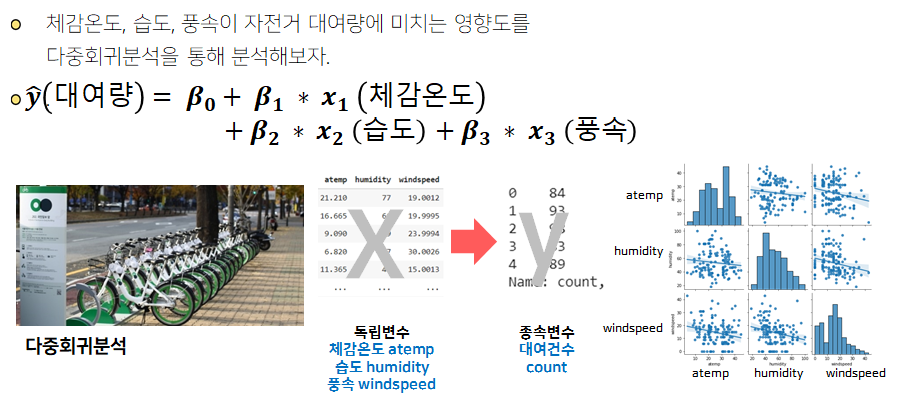

## 2.1 bike 데이터 시각화

In [ ]:
# 2.1.1 자전거 대여량 데이터셋을 적재하여 bike 변수에 할당한다. 
bike = pd.read_csv('https://github.com/sagelab4data/khcumr/blob/main/bikerent_nonworking_noon.csv?raw=true')
bike


In [ ]:
# 2.1.2 페어플롯으로 변수간의 관계를 살펴보자. kind='reg' 옵션으로 회귀선도 함께 관찰해보자.  
...;

In [ ]:
# 2.1.3 각 변수간의 상관계수를 확인해보자. 
...

* count 와 다른 날씨간의 관계는 어떠한가?
* 날씨 / 체감온도 / 습도 / 풍속간의 관계가 관찰되는 곳이 있는가?

In [ ]:
# 2.1.4 질적 변수인 날씨별 대여건수를 상자그래프로 시각화 한다. 
bike.boxplot(column = ..., by = ..., grid = False);

In [ ]:
# 2.1.5 조인트플롯으로 변수들 간의 관계를 확인한다.  회귀선을 부여하기 위해 kind = 'reg' 인수를 전달한다. 
#       체감온도와 대여량의 관계를 확인한다.  (atemp vs. count)

sns.jointplot( data = ..., x= ..., y= ..., kind = ...);

어떤 상관관계가 확인되는가? 

In [ ]:
# 2.1.6 조인트플롯으로 습도와 대여량의 관계를 확인한다. ( humidity vs. count)

sns.jointplot(data = bike, x= ..., y= 'count',  kind = 'reg');

어떤 상관관계가 확인되는가?  체감온도와의 관계와 비교했을 때,  회귀선 주변의 띠의 폭은 어떠한가?


In [ ]:
# 2.1.7 조인트플롯으로 풍속과 대여량의 관계를 확인한다. ( windspeed vs. count)

sns.jointplot(data = bike, x= ..., y= 'count',  kind = 'reg');

* 어떤 상관관계가 확인되는가?  
* 체감온도와의 관계와 비교했을 때,  회귀선 주변의 띠의 폭은 어떠한가? 
* 0 과 5 사이의 자료 분포에서 무엇을 알 수 있는가?

## 2.2 데이터 준비

* 독립변수 X_bike : 체감온도 atemp, 습도 humidity, 풍속 windspeed
* 종속변수 y_count : 대여량 count

In [ ]:
# 2.2.1 회귀분석을 수행하기 위해서 독립변수와 종속변수를 X_bike, y_count에 할당한다. 
y_count = ...
X_bike = ...

## 2.3 다중회귀분석

In [ ]:
# 2.3.1   '#1.4.1' 에서 정의한 my_LinearRegression 함수를 이용해서 회귀분석을 수행하고 보고서를 출력하고
# 보고서 내용을 해석해보자.  ( 정의한 함수는 다중회귀분석도 수행할 수 있다. )
...

* 회귀계수에 나타나는 각 수치는 무엇을 의미하는가?
* 체감온도, 습도, 풍속이 1씩 변화할 때, 대여건은 어떻게 변화하는가?
* 결정계수는 어떻게 나타났는가?  어떻게 해석할 수 있겠는가?
* 모형은 적절한 의미를 갖는가? F-검정 결과는 어떻게 나타났는가 ? 어떻게 해석할 수 있는가?
* 각 변수는 적절한 의미를 갖는가? t-검정 결과는 어떻게 나타나는가?  

## 2.4 연습문제

* 2.3의 다중회귀분석은 후진제거 방식으로 진행하였고,  모든 독립변수가 유의하다고 판정 되었다. 
* 전진 선택방식으로 진행한다면 하나의 변수로 단순회귀을 수행한 다음, 변수를 하나씩 추가 하는 형태로 진행한다. 
> 1. 하나의 독립변수로 회귀분석을 진행하고,  가장 F값이 큰 변수를 선택한다. 
> 2. 가장 F 값이 큰 독립변수에, 두 번째로 F 값이 큰 변수를 추가하여 회귀분석을 수행한다. 
> 3.  여전히 유효하다면 남은 하나의 변수를 추가하여 회귀분석을 수행한다. 

연습문제에서는 전진선택방식으로 회귀분석을 수행해보자. (my_LinearRegression에 적절한 변수를 선택한다)


In [ ]:
# 2.4.1  [단순회귀분석]  체감온도 atemp vs 대여량 count

my_LinearRegression (X_bike[[...]], y_count)

독립변수 : ['atemp']
종속변수 : count
[[ 회귀모형 ]]
lr.coef_: [10.54834209]
lr.intercept_: 111.37887315594418
회귀식 :  y = 111.3789 + 10.5483*X 
[[ 설명력 ]]
lr.score(결정계수 R2): 0.3440642687461626
[[ 적합도 ]]
est.fvalue (F값) : 75.00916337741188
est.f_pvalue (F-검증) : 9.020676321749927e-15 ( 0.0000 )
변수별 t-검증
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        111.3789     32.804      3.395      0.001      46.535     176.223
atemp         10.5483      1.218      8.661      0.000       8.141      12.956


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# 2.4.2  [단순회귀분석]  습도 humidity vs 대여량 count

my_LinearRegression (X_bike[[...]], y_count)

독립변수 : ['humidity']
종속변수 : count
[[ 회귀모형 ]]
lr.coef_: [-2.12794872]
lr.intercept_: 492.6694291211252
회귀식 :  y = 492.6694 + -2.1279*X 
[[ 설명력 ]]
lr.score(결정계수 R2): 0.05135275761257607
[[ 적합도 ]]
est.fvalue (F값) : 7.740964196678006
est.f_pvalue (F-검증) : 0.006127176702165121 ( 0.0061 )
변수별 t-검증
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.6694     42.897     11.485      0.000     407.875     577.464
humidity      -2.1279      0.765     -2.782      0.006      -3.640      -0.616


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# 2.4.3  [단순회귀분석]  풍속 windspeed vs 대여량 count

my_LinearRegression (X_bike[[...]], y_count)

독립변수 : ['windspeed']
종속변수 : count
[[ 회귀모형 ]]
lr.coef_: [-5.18569982]
lr.intercept_: 455.03837816508866
회귀식 :  y = 455.0384 + -5.1857*X 
[[ 설명력 ]]
lr.score(결정계수 R2): 0.08402450222455238
[[ 적합도 ]]
est.fvalue (F값) : 13.117713134567504
est.f_pvalue (F-검증) : 0.00040542901361191006 ( 0.0004 )
변수별 t-검증
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        455.0384     24.653     18.458      0.000     406.307     503.770
windspeed     -5.1857      1.432     -3.622      0.000      -8.016      -2.355


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

*  2.4.1 ~ 2.4.3 까지의 분석결과 가장 F 값이 큰 변수는 무엇인가? (= F의 p-값이 작은 변수)
* 두 번째로 F 값이 큰 변수는 무엇인가? 

In [ ]:
# 2.4.4 [다중회귀분석] F값이 가장 큰 변수와  두 번째 큰 변수 2개를 독립변수로 하여 다중회귀분석을 수행한다. 
my_LinearRegression (X_bike[[...,...]], y_count)

독립변수 : ['atemp' 'windspeed']
종속변수 : count
[[ 회귀모형 ]]
lr.coef_: [ 9.88228165 -3.0498232 ]
lr.intercept_: 172.93933859706843
회귀식 :  y = 172.9393 + 9.8823*X1 + -3.0498*X2 
[[ 설명력 ]]
lr.score(결정계수 R2): 0.3717554503294781
[[ 적합도 ]]
est.fvalue (F값) : 42.01331629098164
est.f_pvalue (F-검증) : 4.646648263394596e-15 ( 0.0000 )
변수별 t-검증
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        172.9393     40.539      4.266      0.000      92.801     253.078
atemp          9.8823      1.225      8.064      0.000       7.460      12.305
windspeed     -3.0498      1.219     -2.502      0.013      -5.460      -0.640


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* 모형 적합도 : F검정 p값은 유의한가?
* 각 변수 유의성 : 각 변수의 t- 검정 p값은 유의한가?

여전히 유의하다면 남은 한 변수 ( 모든 변수!) 로 회귀분석을 수행한다. 

In [ ]:
# 2.4.5 [다중회귀분석] 3개의 변수로 다중회귀분석을 수행한다. ( # 2.3.1 과 동일하다.)
my_LinearRegression (..., y_count)

독립변수 : ['atemp' 'humidity' 'windspeed']
종속변수 : count
[[ 회귀모형 ]]
lr.coef_: [ 9.1836466  -2.09783027 -4.14963979]
lr.intercept_: 318.7267631944045
회귀식 :  y = 318.7268 + 9.1836*X1 + -2.0978*X2 + -4.1496*X3 
[[ 설명력 ]]
lr.score(결정계수 R2): 0.417413855800983
[[ 적합도 ]]
est.fvalue (F값) : 33.674764527088314
est.f_pvalue (F-검증) : 1.7832074367013816e-16 ( 0.0000 )
변수별 t-검증
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        318.7268     58.806      5.420      0.000     202.471     434.983
atemp          9.1836      1.203      7.636      0.000       6.806      11.561
humidity      -2.0978      0.631     -3.324      0.001      -3.345      -0.850
windspeed     -4.1496      1.224     -3.391      0.001      -6.569      -1.731


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

결정계수 $R^2$가 어떻게 변해왔는지 다시 한 번 살펴보자.

# **3.더미변수를 이용한 회귀분석**

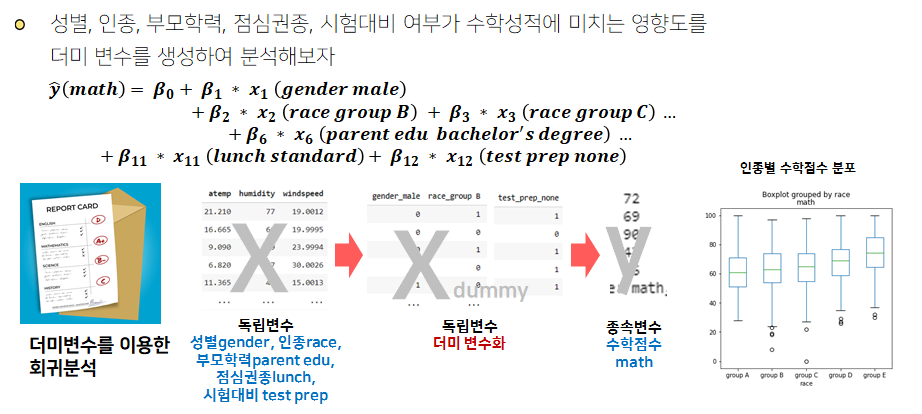

질적변수(명목척도)의 영향도를 평가하기 위해서 더미변수를 생성해서 회귀분석을 수행해본다. 
> * 성별 gender : male, female
> * 인종 race : group A ~ group E
> * 부모학력 parent_edu :bachelor's degree, some college, master's degree, associate's degree, high school, some high school
> * 점심권종 lunch : standard , free/reduced
> * 시험대비 test_prep : none, completed

* **case1 : reading과 math 관계의 영향을 미치는 요소를 찾아본다.** 
* **case2 : 질적 변수만 이용하여 math 점수를 예측해본다.** 

**더미변수의 생성** 
* 판다스의 get_dummies 함수를 사용한다. 
* 질적변수가 n개의 항목값을 가질 때 n-1개의 더미변수로 표현할 수 있다. 
> pd.get_dummies (score['gender'] , drop_first = True )

**데이터프레임 연결** 
* 판다스의 concat 함수를 사용한다. 
* 연결할 데이터프레임 목록을 인수로 전달한다. 
* 가로 방향으로 연결하기 위해서 axis = 'columns' 인수를 전달한다.  
>  pd.concat ([ X_reading , gender_dummy  ], axis = 'columns')

## 3.1 [case1] math-reading 영향 변수 시각화

score 데이터를 적재하고,  변수간의 관계를 시각화하여 관찰하여 독립변수의 후보를 선정해본다. 

In [ ]:
# 3.1.1 score 데이터를 적재하고, 변수명을 간결하게 변경한다. 

# 환경과성적
score = pd.read_csv('https://raw.githubusercontent.com/cranberrygame/data_analysis/master/StudentsPerformance.csv')

# 컬럼이름이 복잡하다. 간결하게 사용할 수 있도록 컬럼이름을 변경한다. 
# 'race/ethnicity' : 'race'
# 'parental level of education' : 'parent_edu'
# 'test preparation course' : 'test_prep'
# 'math score' : 'math'
# 'reading score' : 'reading'
# 'writing score' : 'writing'

# .rename({변경전이름:변경후이름},  axis = 'columns', inplace = True) 메소드로 컬럼명을 변경할 수 있다. 

col_change_dict = { 'race/ethnicity' : 'race',
                    'parental level of education' : 'parent_edu',
                    'test preparation course' : 'test_prep',
                    'math score' : 'math',
                    'reading score' : 'reading',
                    'writing score' : 'writing'}

score.rename(col_change_dict, axis = 'columns', inplace=True)
score.tail()

In [ ]:
# 3.1.2 수치 변수의 기술통계를 확인한다. 

score.describe()

* math와 reading 중 어느 과목이 평균이 높은가?
* math와 reading 중 어느 과목의 표준편차가 더 큰가?

In [ ]:
# 3.1.3 수치 데이터에 해당하는 math, reading, writing에 대해서 페이플롯으로 관찰한다. 

sns.pairplot(...);

In [ ]:
#3.1.4 상관계수로 연관관계를 확인한다. 
...

* reading과 math는 0.8176의 상관관계를 갖는다. 
* 추가적으로 더 잘 설명 할 수 있는 변수가 존재할까?

In [ ]:
# 3.1.5  reading과 math의 점수를 조인트플롯으로 관찰해본다. (kind = 'reg' 로 회귀선도 함께 관찰한다. )

sns.jointplot(data = ..., x= ... , y= ... ,  kind = 'reg');

In [ ]:
# 3.1.6 지난 수업 시간에 gender별로 그룹이 나누어 지는 것을 확인하였다. hue = 'gender'로 확인해보자.
# math vs reading 
sns.jointplot(data = score, x= 'reading', y= 'math', ...);

In [ ]:
# 3.1.7 lunch에 의해서도 영향을 받는가?   hue = 'lunch'로 확인해보자.
# math vs reading 
sns.jointplot(data = score, x= 'reading', y= 'math', ...);

In [ ]:
# 3.1.8 test_prep 에 의해서도 영향을 받는가?   hue = 'test_prep'로 확인해보자.
# math vs reading 
sns.jointplot(data = score, x= 'reading', y= 'math', ...);

In [ ]:
# 3.1.9 race 에 의해서도 영향을 받는가?   hue = 'race'로 확인해보자.
# math vs reading 
sns.jointplot(data = score, x= 'reading', y= 'math', ...);

In [ ]:
# 3.1.10 parent_edu 에 의해서도 영향을 받는가?   hue = 'parent_edu'로 확인해보자.
# math vs reading 
sns.jointplot(data = score, x= 'reading', y= 'math', ...);

## 3.2 [case1] gender 더미데이터 준비

가장 명확하게 영향이 있어보이는 gender를 더미변수화 하여 회귀분석을 진행하기 위해서 gender를 더미변수화 하여 독립변수를 생성한다. 

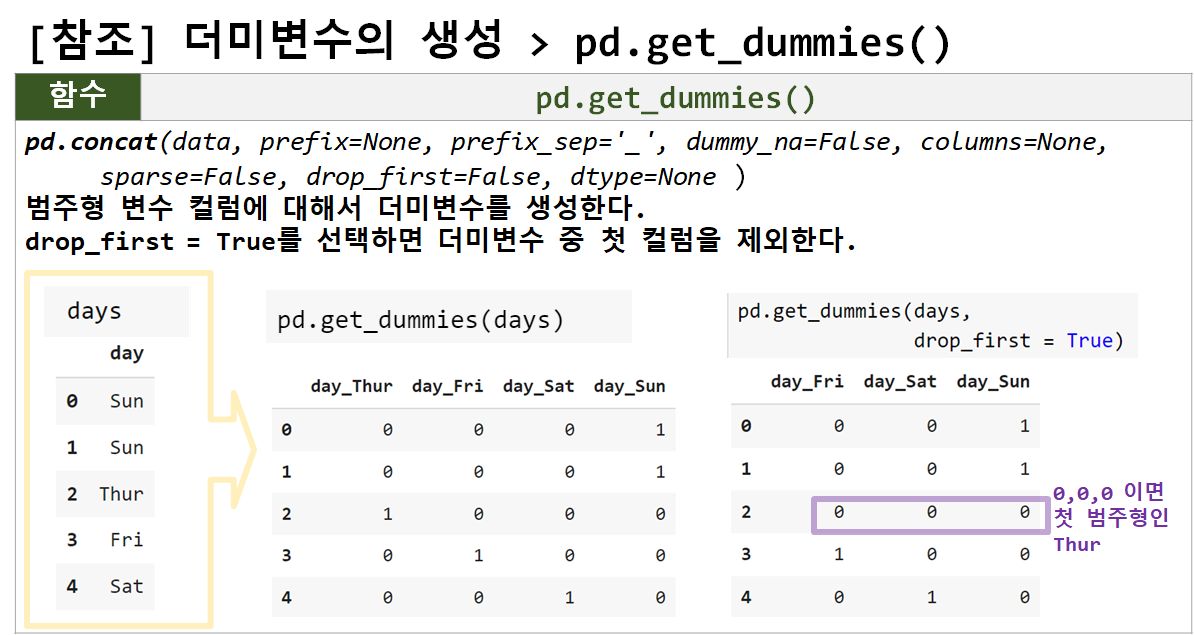

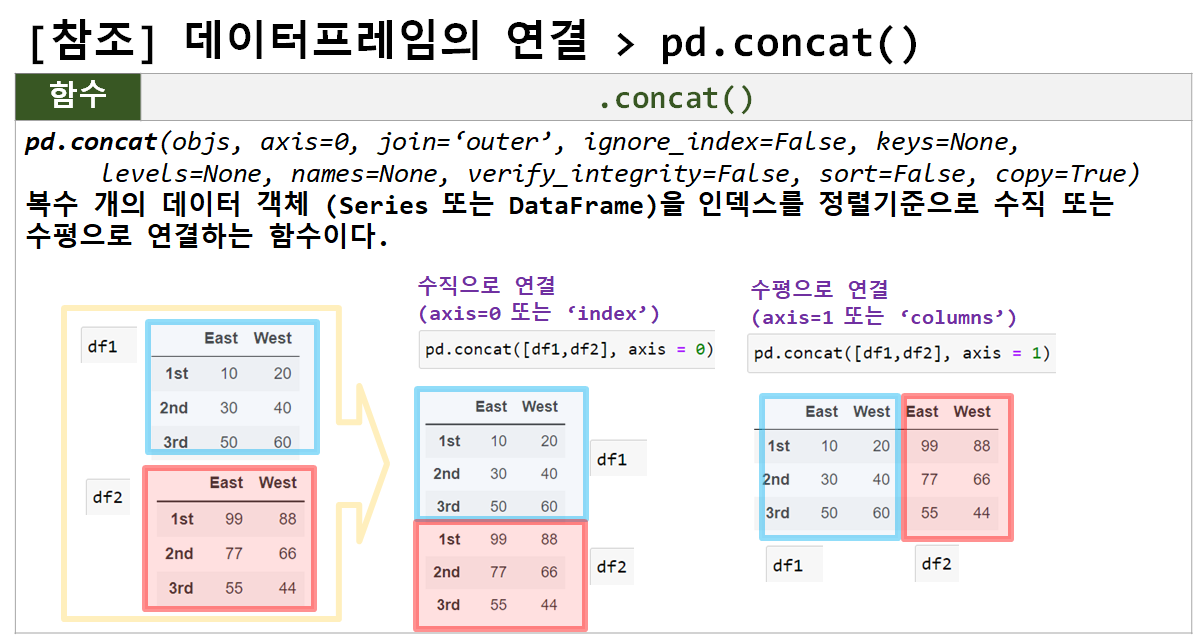

In [ ]:
# 3.2.1 종속변수 math를 y_math에,  독립변수 중 reading을 X_reading에 할당한다. 
y_math = score['math']
X_reading = score[['reading']]

In [ ]:
# 3.2.2 gender를 더미변수화 한다. 
...

In [ ]:
# 3.2.3 gender를 더미변수화 한다. 
#  male/female 2개의 항목은 하나의 더미변수로 표현이 가능하므로 drop_first =True 옵션을 전달한다. 
gender_dummy = pd.get_dummies (score['gender'] , ... )
gender_dummy.tail()

In [ ]:
# 3.2.4 더미변수와 reading 점수를 연결하여 독립변수 X_reading_gender_dummy를 생성한다. 
X_reading_gender_dummy  = pd.... ([... , ...  ], axis = ...)
X_reading_gender_dummy.tail()

## 3.3 [case1] gender 더미변수를 이용한 회귀분석

In [ ]:
# 3.3.1 우선 reading과 math 만으로 회귀분석을 수행해본다. 
my_LinearRegression (..., y_math)

* 회귀식의 의미를 해석해보자. 
* 결정계수의 값을 확인해보자. 
* 적합도 관련 값들을 확인해보자. 

In [ ]:
# 3.3.2 이번에는 gender 더미변수를 포함한 회귀분석 결과를 확인해보자. 
score2_lr = my_LinearRegression (..., y_math)

* 회귀식의 의미를 해석해보자.  gender 변수가 추가 되면서 어떻게 변하였는가.
* 결정계수의 값을 확인해보자.  결정 계수값은 변수가 추가 되면서 상승하였는가?
* 적합도 관련 값들을 확인해보자.  모든 변수가 유의한가?

In [ ]:
# 3.3.3  reading 80, female인 학생의 math 점수를 예측해보자. 

score2_lr.predict ([[...]])

In [ ]:
# 3.3.4  reading 80, male 인 학생의 math 점수를 예측해보자. 

score2_lr.predict ([[...]])

In [ ]:
# 3.3.5  gender로 범주화 된 조인트플롯에  회귀식의 예측결과를 출력해본다. 

y_pred = (score2_lr.predict(X_reading_gender_dummy))

axes = sns.jointplot(data = score, x = 'reading', y ='math', hue = 'gender')
axes.ax_joint.scatter (X_reading_gender_dummy['reading'], y_pred, color = 'r') ;


* 더미변수가 1인가 0인가에 따라서 (즉 male인가 female인가 여부에 따라) 해당 항이 상수 절편항 처럼 추가 되어 2개의 직선을 그리는 효과가 나타난다. 

## 3.4 [case2] score 질적변수 시각화 

reading 점수 없이 질적변수만으로 math 점수를 예측해보고자 한다. (영향력을 분석해보고자 한다. )
* 각 변수 별로 점수 분포를 상자그래프로 시각화해보자.

In [ ]:
# 3.4.1  gender 별로 math 점수를 상자그래프로 시각화해보자. (grid=False, figsize=(5,5) 인수 사용)
score.boxplot(column=..., by = ..., grid=False, figsize = (5,5));

* 점수 분포에 유의한 차이가 있어 보이는가?

In [ ]:
# 3.4.2  race 별로 math 점수를 상자그래프로 시각화해보자. (grid=False, figsize=(5,5) 인수 사용)
score.boxplot(column='math', by = ..., grid=False, figsize = (5,5));

* 점수 분포에 유의한 차이가 있어 보이는가?
* 어느 그룹이 높아 보이는가?
* 어느 그룹이 낮아 보이는가?

In [ ]:
# 3.4.3  parent_edu 별로 math 점수를 상자그래프로 시각화해보자. (grid=False, figsize=(5,5) 인수 사용)
score.boxplot(column='math', by = ..., grid=False, figsize = (5,5))
plt.xticks(rotation=45) ;

* 점수 분포에 유의한 차이가 있어 보이는가?
* 어느 그룹이 높아 보이는가?
* 어느 그룹이 낮아 보이는가?

In [ ]:
# 3.4.4  lunch 별로 math 점수를 상자그래프로 시각화해보자. (grid=False, figsize=(5,5) 인수 사용)
score.boxplot(column='math', by = ..., grid=False, figsize = (5,5));

* 점수 분포에 유의한 차이가 있어 보이는가?

In [ ]:
# 3.4.5  test_prep 별로 math 점수를 상자그래프로 시각화해보자. (grid=False, figsize=(5,5) 인수 사용)
score.boxplot(column='math', by = ... , grid=False, figsize = (5,5));

* 점수 분포에 유의한 차이가 있어 보이는가?

## 3.5 [case2] score 모든 질적변수의 더미데이터 준비 

In [ ]:
# 3.5.1 모든 질적별수를 더미변수로 생성하여 X_score_dummy에 저장한다.
#    gender, race, parent_edu, lunch, test_prep
X_score_dummy = pd.get_dummies (... ,
                                drop_first= True )
X_score_dummy.tail()

## 3.6 [case2] 질적변수로만 math 예측해보기

In [ ]:
# 3.6.1 X_score_dummy를 독립변수로 하여 회귀분석을 수행한다.
my_LinearRegression (..., y_math)

* 회귀 모형의 해석이 용이한가?
* 변수의 개수가 많아지면, 결정계수가 높아진다. 
* 모형의 적합도 F 값 및 그 p값은 어떤 의미를 갖는가?
* 각 변수 중 유의 하지 않다고 판단 된 변수는 어떤 변수가 있는가? 


In [ ]:
# 3.6.2 유의하지 않다고 판단되는 5개의 변수를 제외하고 회귀 분석을 수행해본다. 
#  제외 변수 : race_group B, race_group C,
#             parent_edu_bachelor's degree , parent_edu_master's degree, parent_edu_some college
X_score_dummy_2 = X_score_dummy[['gender_male','race_group D', 'race_group E',
                                 'parent_edu_high school',
                                 'parent_edu_some high school',
                                 'lunch_standard',
                                 'test_prep_none']]
my_LinearRegression (X_score_dummy_2, y_math)

* 결정계수는 어떻게 변하였는가?
* 적합도 검정결과는 어떻한가
* 회귀계수의 의미를 살펴보자.

## 3.7 연습문제

[case1]에서 math-reading 점수간의 관계에서 gender 대신에 lunch로 그 영향도를 분석해보자. 

In [ ]:
# 3.7.1  lunch의 더미변수를 생성한다. 
lunch_dummy = pd.get_dummies ( ... , drop_first = True )
lunch_dummy

,standard
0,1
1,1
2,1
3,0
4,1
...,...
995,1
996,0
997,0
998,1


In [ ]:
# 3.7.2 lunch 더미변수와 reading 변수를 연결하여 독립변수 X_reading_lunch_dummy를 정의한다. 
X_reading_lunch_dummy  = pd.concat ([ ... , lunch_dummy  ],
           axis = 'columns')
X_reading_lunch_dummy.tail()

,reading,standard
995,99,1
996,55,0
997,71,0
998,78,1
999,86,0


In [ ]:
# 3.7.3 lunch의 영향도를 포함하여 reading과 math의 관계를 회귀분석 해보자.  
score3_lr = my_LinearRegression ( ... , y_math)

독립변수 : ['reading' 'standard']
종속변수 : math
[[ 회귀모형 ]]
lr.coef_: [0.80802893 5.45617937]
lr.intercept_: 6.679211466978408
회귀식 :  y = 6.6792 + 0.8080*X1 + 5.4562*X2 
[[ 설명력 ]]
lr.score(결정계수 R2): 0.6965499134670468
[[ 적합도 ]]
est.fvalue (F값) : 1144.2742885018602
est.f_pvalue (F-검증) : 6.614574880418204e-259 ( 0.0000 )
변수별 t-검증
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6792      1.283      5.207      0.000       4.162       9.196
reading        0.8080      0.019     43.406      0.000       0.771       0.845
standard       5.4562      0.568      9.611      0.000       4.342       6.570


* 회귀계수를 해석해보자. lunch 권종에 따른 차이가 어느정도 점수 영향을 미치는가?
* 결정계수를 살펴본다. reading과 math만을 비교해보았을 때보다 좋아졌는가? 
* 두 변수 모두 유의하게 판단되는가?

In [ ]:
# 3.7.4  reading 80점 lunch 권종 standard인 학생의 math 점수를 예측해보자. 
score3_lr....([[ ... ]])


array([76.77770498])